# Introduction to `pandas`

:::{note}
This material is mostly adapted from the following resources:
- [Earth and Environmental Data Science: Pandas](https://earth-env-data-science.github.io/lectures/pandas/pandas_intro.html)
- [Python Programming for Data Science: Pandas](https://www.tomasbeuzen.com/python-programming-for-data-science/chapters/chapter7-pandas.html)
- [Data Science for Energy System Modelling: Introduction to pandas](https://fneum.github.io/data-science-for-esm/03-workshop-pandas.html)
:::

<img src="https://pandas.pydata.org/static/img/pandas.svg" width="300px" />

[Pandas](http://pandas.pydata.org/) is a an open source library providing high-performance, easy-to-use data structures and data analysis tools. Pandas is particularly suited to the analysis of _tabular_ data, i.e. data that can can go into a table. In other words, if you can imagine the data in an Excel spreadsheet, then Pandas is the tool for the job.
Panda offers:
- A fast and efficient DataFrame object for data manipulation with indexing;
- Tools for reading and writing data: CSV and text files, Excel, SQL;
- Intelligent data alignment and integrated handling of missing data;
- Flexible reshaping and pivoting of data sets;
- Intelligent label-based slicing, indexing, and subsetting of large data sets;
- High performance aggregating, merging, joining or transforming data;
- Hierarchical indexing provides an intuitive way of working with high-dimensional data;
- Time series-functionality: date-based indexing, frequency conversion, moving windows, date shifting and lagging;

<img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/creating_dataframe1.png" width="720px" />

:::{note}
Documentation for this package is available at https://pandas.pydata.org/docs/.
:::

:::{note}
If you have not yet set up Python on your computer, you can execute this tutorial in your browser via [Google Colab](https://colab.research.google.com/). Click on the rocket in the top right corner and launch "Colab". If that doesn't work download the `.ipynb` file and import it in [Google Colab](https://colab.research.google.com/).

Then install `pandas` and `numpy` by executing the following command in a Jupyter cell at the top of the notebook.

```sh
!pip install pandas numpy
```
:::

In [1]:
import pandas as pd
import numpy as np

## Pandas Data Structures: Series

A Series represents a one-dimensional array of data. The main difference between a Series and numpy array is that a Series has an **index**. The index contains the labels that we use to access the data.

There are many ways to [create a Series](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#series). We will just show a few. The core constructor is [`pd.Series()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html).

(Data are from Wikipedia's [List of photovoltaic power stations](https://en.wikipedia.org/wiki/List_of_photovoltaic_power_stations).)

In [2]:
names = ["Gonghe Talatan", "Midong","Bhadla"]
values = [10380, 3500, 2245]
s = pd.Series(values, index=names)
s

Gonghe Talatan    10380
Midong             3500
Bhadla             2245
dtype: int64

In [3]:
dictionary = {
    "Gonghe Talatan": 10380,
    "Midong": 3500,
    "Bhadla": 2245
}
s = pd.Series(dictionary)
s

Gonghe Talatan    10380
Midong             3500
Bhadla             2245
dtype: int64

Arithmetic operations and most `numpy` functions can be applied to `pd.Series`.
An important point is that the Series keep their index during such operations.

In [4]:
np.log(s) / s**0.5

Gonghe Talatan    0.090768
Midong            0.137938
Bhadla            0.162858
dtype: float64

We can access the underlying index object if we need to:

In [5]:
s.index

Index(['Gonghe Talatan', 'Midong', 'Bhadla'], dtype='object')

We can get values back out using the index via the `.loc` attribute

In [6]:
s.loc["Bhadla"]

np.int64(2245)

Or by raw position using `.iloc`

In [7]:
s.iloc[2]

np.int64(2245)

We can pass a list or array to loc to get multiple rows back:

In [8]:
s.loc[['Gonghe Talatan', 'Midong']]

Gonghe Talatan    10380
Midong             3500
dtype: int64

And we can even use slice notation

In [9]:
s.loc['Gonghe Talatan': 'Midong']

Gonghe Talatan    10380
Midong             3500
dtype: int64

In [10]:
s.iloc[:2]

Gonghe Talatan    10380
Midong             3500
dtype: int64

If we need to, we can always get the raw data back out as well

In [11]:
s.values  # a numpy array

array([10380,  3500,  2245])

## Pandas Data Structures: DataFrame

There is a lot more to Series, but they are limit to a single **column**. A more useful Pandas data structure is the **DataFrame**. A DataFrame is basically a bunch of series that share the same index. It's a lot like a table in a spreadsheet.

The core constructor is `pd.DataFrame()`

Below we create a DataFrame.

In [12]:
# first we create a dictionary
data = {
    "capacity": [10380,  3500,  2245],  # MW
    "type": ["photovoltaic", "photovoltaic", "photovoltaic"],
    "start_year": [2023, 2024, 2018],
    "end_year": [np.nan, np.nan, np.nan],
}
df = pd.DataFrame(data, index=["Gonghe Talatan", "Midong","Bhadla"])
df

,capacity,type,start_year,end_year
Gonghe Talatan,10380,photovoltaic,2023,NaN
Midong,3500,photovoltaic,2024,NaN
Bhadla,2245,photovoltaic,2018,NaN


We can also switch columns and rows very easily.

In [13]:
df.T

,Gonghe Talatan,Midong,Bhadla
capacity,10380,3500,2245
type,photovoltaic,photovoltaic,photovoltaic
start_year,2023,2024,2018
end_year,NaN,NaN,NaN


A wide range of statistical functions are available on both Series and DataFrames.

In [14]:
df.min()

capacity              2245
type          photovoltaic
start_year            2018
end_year               NaN
dtype: object

In [15]:
df.mean(numeric_only=True)

capacity      5375.000000
start_year    2021.666667
end_year              NaN
dtype: float64

In [16]:
df.std(numeric_only=True)

capacity      4379.64325
start_year       3.21455
end_year             NaN
dtype: float64

In [17]:
df.describe()

,capacity,start_year,end_year
count,3.00000,3.000000,0.0
mean,5375.00000,2021.666667,NaN
std,4379.64325,3.214550,NaN
min,2245.00000,2018.000000,NaN
25%,2872.50000,2020.500000,NaN
50%,3500.00000,2023.000000,NaN
75%,6940.00000,2023.500000,NaN
max,10380.00000,2024.000000,NaN


We can get a single column as a Series using python's getitem syntax on the DataFrame object.

In [18]:
df["capacity"]

Gonghe Talatan    10380
Midong             3500
Bhadla             2245
Name: capacity, dtype: int64

...or using attribute syntax.

In [19]:
df.capacity

Gonghe Talatan    10380
Midong             3500
Bhadla             2245
Name: capacity, dtype: int64

Indexing works very similar to series

In [20]:
df.loc["Bhadla"]

capacity              2245
type          photovoltaic
start_year            2018
end_year               NaN
Name: Bhadla, dtype: object

In [21]:
df.iloc[2]

capacity              2245
type          photovoltaic
start_year            2018
end_year               NaN
Name: Bhadla, dtype: object

But we can also specify the column(s) and row(s) we want to access

In [22]:
df.loc["Bhadla", "start_year"]

np.int64(2018)

In [23]:
df.loc[["Midong", "Bhadla"], ["start_year", "end_year"]]

,start_year,end_year
Midong,2024,NaN
Bhadla,2018,NaN


We can operate with values in DataFrame

In [24]:
df.capacity * 0.8

Gonghe Talatan    8304.0
Midong            2800.0
Bhadla            1796.0
Name: capacity, dtype: float64

Which we can easily add as another column to the DataFrame:

In [25]:
df["reduced_capacity"] = df.capacity * 0.8
df

,capacity,type,start_year,end_year,reduced_capacity
Gonghe Talatan,10380,photovoltaic,2023,NaN,8304.0
Midong,3500,photovoltaic,2024,NaN,2800.0
Bhadla,2245,photovoltaic,2018,NaN,1796.0


We can also remove columns or rows from a DataFrame:

In [26]:
df.drop("reduced_capacity", axis="columns")

,capacity,type,start_year,end_year
Gonghe Talatan,10380,photovoltaic,2023,NaN
Midong,3500,photovoltaic,2024,NaN
Bhadla,2245,photovoltaic,2018,NaN


We can update the variable `df` by either overwriting `df` or passing an `inplace` keyword:

In [27]:
df.drop("reduced_capacity", axis="columns", inplace=True)

We can also drop columns with only NaN values

In [28]:
df.dropna(axis=1)

,capacity,type,start_year
Gonghe Talatan,10380,photovoltaic,2023
Midong,3500,photovoltaic,2024
Bhadla,2245,photovoltaic,2018


Or fill it up with default "fallback" data:

In [29]:
df.fillna(2050)

,capacity,type,start_year,end_year
Gonghe Talatan,10380,photovoltaic,2023,2050.0
Midong,3500,photovoltaic,2024,2050.0
Bhadla,2245,photovoltaic,2018,2050.0


Say, we already have one value for `end_year` and want to fill up the missing data:

In [30]:
df.loc["Bhadla", "end_year"] = 2050

In [31]:
# backward (upwards) fill from non-nan values
df.bfill()

,capacity,type,start_year,end_year
Gonghe Talatan,10380,photovoltaic,2023,2050.0
Midong,3500,photovoltaic,2024,2050.0
Bhadla,2245,photovoltaic,2018,2050.0


## Sorting Data

We can also sort the entries in dataframes, e.g. alphabetically by index or numerically by column values

In [32]:
df.sort_index()

,capacity,type,start_year,end_year
Bhadla,2245,photovoltaic,2018,2050.0
Gonghe Talatan,10380,photovoltaic,2023,NaN
Midong,3500,photovoltaic,2024,NaN


In [33]:
df.sort_values(by="capacity", ascending=False)

,capacity,type,start_year,end_year
Gonghe Talatan,10380,photovoltaic,2023,NaN
Midong,3500,photovoltaic,2024,NaN
Bhadla,2245,photovoltaic,2018,2050.0


If we make a calculation using columns from the DataFrame, it will keep the same index:

## Merging Data

Pandas supports a wide range of methods for merging different datasets. These are described extensively in the [documentation](https://pandas.pydata.org/pandas-docs/stable/merging.html). Here we just give a few examples.

In [34]:
data = {
    "capacity": [2050, 1650, 1350],  # MW
    "type": ["photovoltaic", "photovoltaic","photovoltaic",],
    "start_year": [2019, 2019, 2021],
}
df2 = pd.DataFrame(data, index=["Pavagada", "Benban", "Kalyon Karapinar"])
df2

,capacity,type,start_year
Pavagada,2050,photovoltaic,2019
Benban,1650,photovoltaic,2019
Kalyon Karapinar,1350,photovoltaic,2021


We can now add this additional data to the `df` object

In [35]:
df = pd.concat([df, df2])
df

,capacity,type,start_year,end_year
Gonghe Talatan,10380,photovoltaic,2023,NaN
Midong,3500,photovoltaic,2024,NaN
Bhadla,2245,photovoltaic,2018,2050.0
Pavagada,2050,photovoltaic,2019,NaN
Benban,1650,photovoltaic,2019,NaN
Kalyon Karapinar,1350,photovoltaic,2021,NaN


## Filtering Data

We can also filter a DataFrame using a boolean series obtained from a condition. This is very useful to build subsets of the DataFrame.

In [36]:
df.capacity > 2000

Gonghe Talatan       True
Midong               True
Bhadla               True
Pavagada             True
Benban              False
Kalyon Karapinar    False
Name: capacity, dtype: bool

In [37]:
df[df.capacity > 2000]

,capacity,type,start_year,end_year
Gonghe Talatan,10380,photovoltaic,2023,NaN
Midong,3500,photovoltaic,2024,NaN
Bhadla,2245,photovoltaic,2018,2050.0
Pavagada,2050,photovoltaic,2019,NaN


We can also combine multiple conditions, but we need to wrap the conditions with brackets!

In [38]:
df[(df.capacity > 2000) & (df.start_year >= 2020)]

,capacity,type,start_year,end_year
Gonghe Talatan,10380,photovoltaic,2023,NaN
Midong,3500,photovoltaic,2024,NaN


Or we make [SQL-like](https://en.wikipedia.org/wiki/SQL) queries:

In [39]:
df.query("start_year == 2019")

,capacity,type,start_year,end_year
Pavagada,2050,photovoltaic,2019,NaN
Benban,1650,photovoltaic,2019,NaN


In [40]:
threshold = 2000
df.query("start_year == 2019 and capacity > @threshold")

,capacity,type,start_year,end_year
Pavagada,2050,photovoltaic,2019,NaN


## Modifying Values

In many cases, we want to modify values in a dataframe based on some rule. To modify values, we need to use `.loc` or `.iloc`

In [41]:
df.loc["Bhadla", "capacity"] += 500
df

,capacity,type,start_year,end_year
Gonghe Talatan,10380,photovoltaic,2023,NaN
Midong,3500,photovoltaic,2024,NaN
Bhadla,2745,photovoltaic,2018,2050.0
Pavagada,2050,photovoltaic,2019,NaN
Benban,1650,photovoltaic,2019,NaN
Kalyon Karapinar,1350,photovoltaic,2021,NaN


## Applying Functions

Sometimes it can be useful apply a function to all values of a column/row. For instance, we might be interested in normalised capacities relative to the largest PV power plant:

In [42]:
df.capacity.apply(lambda x: x / df.capacity.max())

Gonghe Talatan      1.000000
Midong              0.337187
Bhadla              0.264451
Pavagada            0.197495
Benban              0.158960
Kalyon Karapinar    0.130058
Name: capacity, dtype: float64

In [43]:
df.capacity.map(lambda x: x / df.capacity.max())

Gonghe Talatan      1.000000
Midong              0.337187
Bhadla              0.264451
Pavagada            0.197495
Benban              0.158960
Kalyon Karapinar    0.130058
Name: capacity, dtype: float64

For simple functions, there's often an easier alternative:

In [44]:
df.capacity / df.capacity.max()

Gonghe Talatan      1.000000
Midong              0.337187
Bhadla              0.264451
Pavagada            0.197495
Benban              0.158960
Kalyon Karapinar    0.130058
Name: capacity, dtype: float64

But `.apply()` and `.map()` often give you more flexibility.

## Renaming Indices and Columns

Sometimes it can be useful to rename columns:

In [45]:
df.rename(columns=dict(start_year="commission", end_year="decommission"))

,capacity,type,commission,decommission
Gonghe Talatan,10380,photovoltaic,2023,NaN
Midong,3500,photovoltaic,2024,NaN
Bhadla,2745,photovoltaic,2018,2050.0
Pavagada,2050,photovoltaic,2019,NaN
Benban,1650,photovoltaic,2019,NaN
Kalyon Karapinar,1350,photovoltaic,2021,NaN


## Replacing Values

Sometimes it can be useful to replace values:

In [46]:
df.replace({"photovoltaic": "PV"})

,capacity,type,start_year,end_year
Gonghe Talatan,10380,PV,2023,NaN
Midong,3500,PV,2024,NaN
Bhadla,2745,PV,2018,2050.0
Pavagada,2050,PV,2019,NaN
Benban,1650,PV,2019,NaN
Kalyon Karapinar,1350,PV,2021,NaN


## Plotting

DataFrames have all kinds of [useful plotting](https://pandas.pydata.org/pandas-docs/stable/visualization.html) built in. Note that we do not even have to import `matplotlib` for this.

<Axes: xlabel='start_year', ylabel='capacity'>

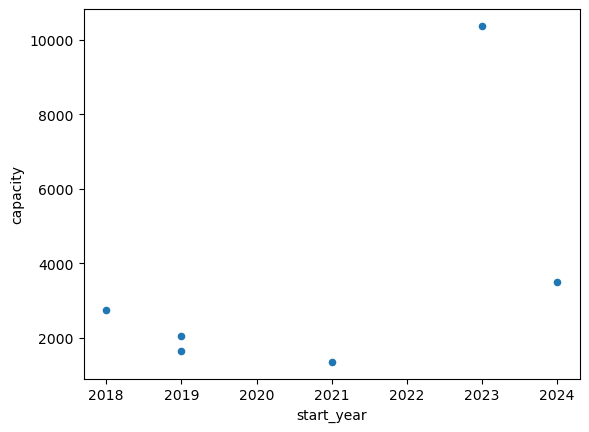

In [47]:
df.plot(kind="scatter", x="start_year", y="capacity")

<Axes: >

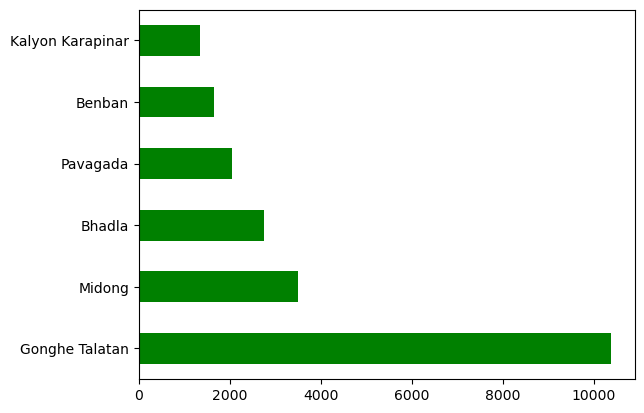

In [48]:
df.capacity.plot.barh(color="green")

## Reading and Writing Files

To read data into pandas, we can use for instance the [`pd.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) function. This function is incredibly powerful and complex with a multitude of settings. You can use it to extract data from almost any text file.

The `pd.read_csv()` function can take a path to a local file as an input, or even a link to an online text file.

Let's import a file containing data measured at a weather station.

In [49]:
fn = "weather_station_data.csv"

In [50]:
df = pd.read_csv(fn, index_col=0)
df.iloc[:5, :10]

,GHI (W.m-2),DHI (W.m-2),Ambient Temperature (Deg C),Relative Humidity (%),wind velocity (m.s-1),wind direction (deg)
2024-01-01 00:00:00+00:00,3.290,2.187,5.428,95.4,2.409,120.8
2024-01-01 00:05:00+00:00,3.201,2.013,5.425,95.4,2.951,123.8
2024-01-01 00:10:00+00:00,3.308,2.203,5.456,95.5,2.648,124.9
2024-01-01 00:15:00+00:00,3.010,1.796,5.470,95.5,2.723,122.0
2024-01-01 00:20:00+00:00,3.479,2.370,5.491,95.4,2.478,125.5


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52704 entries, 2024-01-01 00:00:00+00:00 to 2024-07-01 23:55:00+00:00
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   GHI (W.m-2)                  52249 non-null  float64
 1   DHI (W.m-2)                  52249 non-null  float64
 2   Ambient Temperature (Deg C)  52249 non-null  float64
 3   Relative Humidity (%)        52249 non-null  float64
 4   wind velocity (m.s-1)        52274 non-null  float64
 5   wind direction (deg)         52274 non-null  float64
dtypes: float64(6)
memory usage: 2.8+ MB


In [52]:
df.describe()

,GHI (W.m-2),DHI (W.m-2),Ambient Temperature (Deg C),Relative Humidity (%),wind velocity (m.s-1),wind direction (deg)
count,52249.000000,52249.000000,52249.000000,52249.000000,52274.000000,52274.000000
mean,125.476227,64.949393,7.658637,81.494715,2.822048,172.038209
std,205.015278,94.282571,6.425798,13.194039,1.618026,91.322030
min,0.933000,0.474000,-13.290000,27.650000,0.000000,0.000000
25%,3.631000,2.414000,3.609000,75.200000,1.630250,93.600000
50%,13.220000,11.850000,7.053000,85.400000,2.629000,174.900000
75%,158.400000,94.900000,11.930000,91.200000,3.779000,248.600000
max,1246.000000,645.100000,26.710000,100.000000,13.180000,360.000000


Sometimes, we also want to store a DataFrame for later use. There are many different file formats tabular data can be stored in,  including HTML, JSON, Excel, Parquet, Feather, etc. Here, let's say we want to store the DataFrame as CSV (comma-separated values) file under the name "data.csv".

In [53]:
df.to_csv("data.csv")